In [2]:
# import cv2
# import numpy as np

# def contour_shape(bin_img, rgb_img):
#     # 1. Load your binary image and find contours
#     binary_image = cv2.imread(bin_img, cv2.IMREAD_GRAYSCALE)
#     if binary_image is None:
#         print(f"Error: Could not load binary image at {bin_img}")
#         return
    
#     contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # 2. Filter contours by size
#     rectangular_contours = []
#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         if w > 100 and h > 100:  # Only keep large contours
#             rectangular_contours.append(contour)

#     # 3. Load the original RGB image
#     rgb_image = cv2.imread(rgb_img)
#     if rgb_image is None:
#         print(f"Error: Could not load RGB image at {rgb_img}")
#         return
    
#     # Draw contours on the RGB image
#     result_image = rgb_image.copy()
#     cv2.drawContours(result_image, rectangular_contours, -1, (0, 0, 255), 2)  # Red contours

#     # 4. Display and save results
#     cv2.imshow("Rectangular Contours", result_image)
#     cv2.imwrite("rgb_img_with_contour.png", result_image)  # Fixed variable name here
#     print(f"Total contours detected: {len(contours)}")
#     print(f"Large rectangular contours detected: {len(rectangular_contours)}")
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    

# if __name__ == "__main__":  # Fixed: was "main" in quotes
#     # Input paths
#     rgb_img_path = "data/alexey's_data/IMG_20250416_121855.jpg"
    
#     # Process the RGB image to create binary image
#     rgb_image = cv2.imread(rgb_img_path)
#     if rgb_image is None:
#         print(f"Error: Could not load RGB image at {rgb_img_path}")
#     else:
#         gray_img = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
#         blur_img = cv2.GaussianBlur(gray_img, (15, 15), 0)
#         _, bin_img = cv2.threshold(blur_img, 200, 255, cv2.THRESH_BINARY)  # Fixed: added _ to capture retval
        
#         # Save binary image temporarily
#         cv2.imwrite("temp_binary.png", bin_img)
        
#         # Call contour detection function
#         contour_shape(bin_img="temp_binary.png", rgb_img=rgb_img_path)

In [1]:
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import math

In [23]:
kernel= np.array( [  [-1,-1,-1], [-1,9,-1], [-1,-1,-1] ]  ).astype("uint8") #sharpen
kernel1 = np.ones((5,5), np.uint8) #blur
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 5)) #rectangular Kernel
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7)) # Square kernel

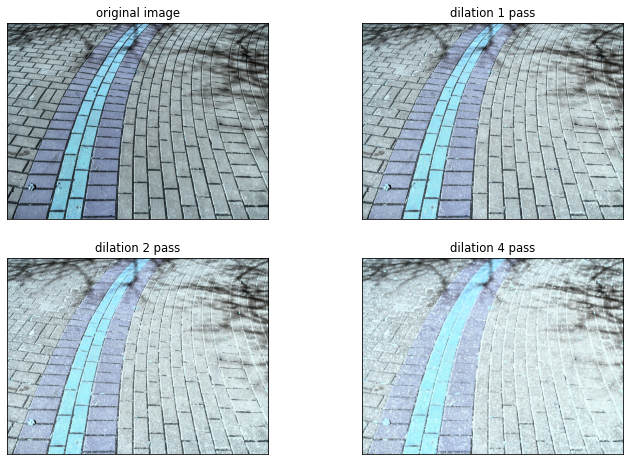

In [24]:
alexey_image = cv2.imread("data/alexey's_data/IMG_20250416_121855.jpg", cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(alexey_image, (3,3), 0)
# experiment different dilations on them
dilation_1 = cv2.dilate(blur, kernel1, iterations=1)
dilation_2 = cv2.dilate(blur, kernel1, iterations=2)
dilation_4 = cv2.dilate(blur, kernel1, iterations=4)

all_dilations = ['original image','dilation 1 pass', 'dilation 2 pass', 'dilation 4 pass']
dilated_images = [alexey_image,dilation_1, dilation_2, dilation_4]

figure(figsize=(12,8), dpi=70)

for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(dilated_images[i], 'gray')
    plt.title(all_dilations[i])
    plt.xticks([]), plt.yticks([])
plt.show()


I am noticing something here. by using dilation with 4 iteration, the kernel also used was a blur kernel that have values of only ones. i noticed that the dilation operation extends the white pixel and blurs out the boundaries. The boundaries in the 4th image are less visible than the ones at the the previous ones. I believe if i apply more iterations of the dilation operation on it, i'll achieve more better results.
To get the best results, we need to select the best blur kernels and

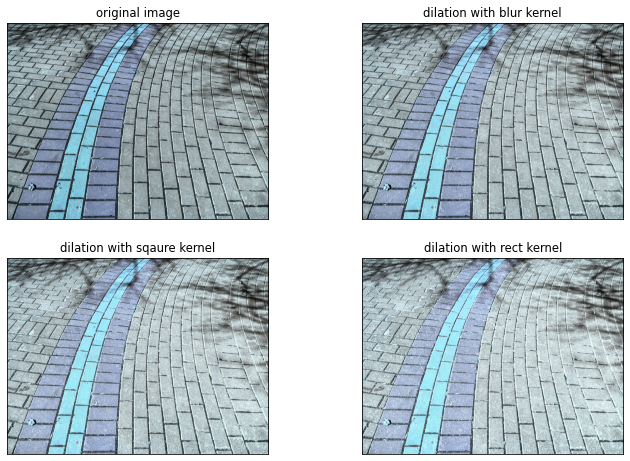

In [25]:
# try the dilation with other kernels.
dilation_k = cv2.dilate(blur, kernel, iterations=1)
dilation_k1 = cv2.dilate(blur, kernel1, iterations=1)
dilation_sqkernel = cv2.dilate(blur, sqKernel, iterations=1)
dilation_rectkernel = cv2.dilate(blur, rectKernel, iterations=1)

dilation_all_kernels = ['original image','dilation with blur kernel', 'dilation with sqaure kernel', 'dilation with rect kernel']
dilated_images = [alexey_image,dilation_k, dilation_k1, dilation_sqkernel, dilation_rectkernel]

figure(figsize=(12,8), dpi=70)

for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(dilated_images[i], 'gray')
    plt.title(dilation_all_kernels[i])
    plt.xticks([]), plt.yticks([])
plt.show()

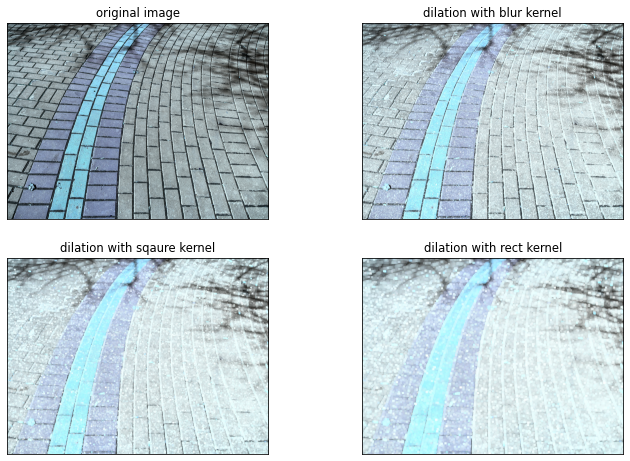

In [28]:
# try the dilation with other kernels with more iterations now.
dilation_k = cv2.dilate(blur, kernel, iterations=5)
dilation_k1 = cv2.dilate(blur, kernel1, iterations=5)
dilation_sqkernel = cv2.dilate(blur, sqKernel, iterations=5)
dilation_rectkernel = cv2.dilate(blur, rectKernel, iterations=5)

dilation_all_kernels = ['original image','dilation with blur kernel', 'dilation with sqaure kernel', 'dilation with rect kernel']
dilated_images = [alexey_image,dilation_k, dilation_k1, dilation_sqkernel, dilation_rectkernel]

figure(figsize=(12,8), dpi=70)

for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(dilated_images[i], 'gray')
    plt.title(dilation_all_kernels[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
def experiment(blur, iterations):
    dilation_k = cv2.dilate(blur, kernel, iterations=iterations)
    dilation_k1 = cv2.dilate(blur, kernel1, iterations=iterations)
    dilation_sqkernel = cv2.dilate(blur, sqKernel, iterations=iterations)
    dilation_rectkernel = cv2.dilate(blur, rectKernel, iterations=iterations)

    dilation_all_kernels = ['original image','dilation with blur kernel', 'dilation with sqaure kernel', 'dilation with rect kernel']
    dilated_images = [alexey_image,dilation_k, dilation_k1, dilation_sqkernel, dilation_rectkernel]

    figure(figsize=(12,8), dpi=70)

    for i in range(4):
        plt.subplot(2,2,i+1), plt.imshow(dilated_images[i], 'gray')
        plt.title(dilation_all_kernels[i])
        plt.xticks([]), plt.yticks([])
    return plt.show()

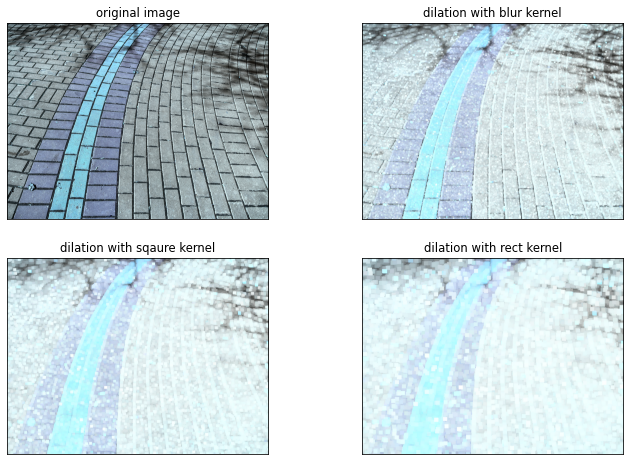

In [30]:
experiment(blur, iterations=10)

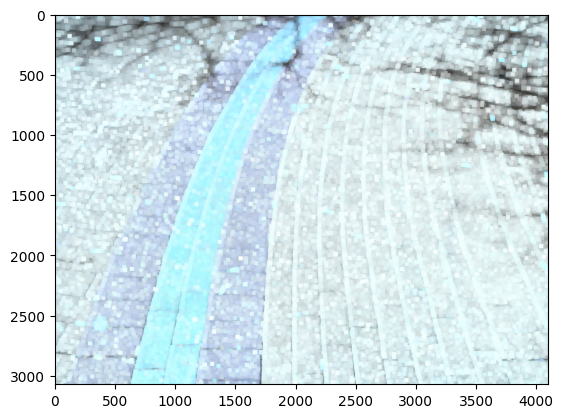

In [32]:
plt.imshow(dilation_sqkernel, 'gray')

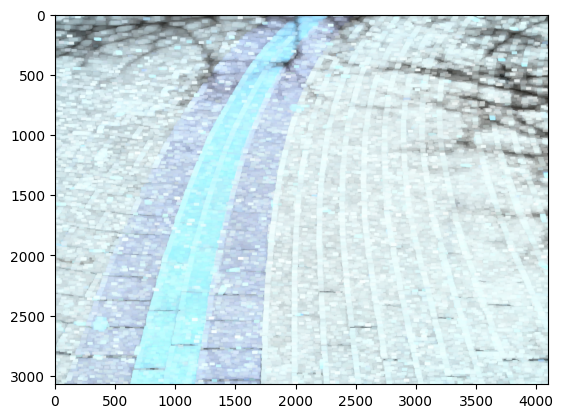

In [33]:
plt.imshow(dilation_rectkernel, 'gray')

In [41]:
gray_rect = cv2.cvtColor(dilation_rectkernel, cv2.COLOR_BGR2GRAY)

_, rect_bin_img  = cv2.threshold(gray_rect, np.mean(gray_rect), 255, cv2.THRESH_BINARY)
cv2.imwrite("bin_img_rect.png", rect_bin_img)

True

In [40]:
np.mean(dilation_rectkernel)

np.float64(219.74737649493747)

In [ ]:


# 1. Load the grayscale image
gray_image = cv2.imread("data/alexey's_data/IMG_20250416_121855.jpg", cv2.IMREAD_GRAYSCALE)

# 2. Apply a less aggressive binary threshold to capture all potential lines
line_thresh_value = 150  # Adjust this to capture the lines fully
_, binary_lines = cv2.threshold(gray_image, line_thresh_value, 255, cv2.THRESH_BINARY)

# 3. Create the initial ROI mask (aggressive threshold)
initial_thresh_value = 200  # Adjust this to target the brightest regions
_, roi_mask = cv2.threshold(gray_image, initial_thresh_value, 255, cv2.THRESH_BINARY)

# 4. Define the dilation kernel (for the potential line regions)
dilation_kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size as needed

# 5. Dilate the binary lines within the ROI
dilated_lines = cv2.dilate(binary_lines, dilation_kernel, iterations=1) # Adjust iterations

# 6. Define the erosion kernel (for the regions outside the initial ROI)
erosion_kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size as needed

# 7. Create a mask for the background (inverse of the ROI mask)
background_mask = cv2.bitwise_not(roi_mask)

# 8. Erode the binary lines in the background regions
eroded_background = cv2.erode(binary_lines, erosion_kernel, iterations=1) # Adjust iterations
eroded_background_masked = cv2.bitwise_and(eroded_background, background_mask)

# 9. Combine the dilated lines within the ROI and the eroded background
final_lines = cv2.bitwise_or(cv2.bitwise_and(dilated_lines, roi_mask), eroded_background_masked)

# 10. Display the result
cv2.imshow("Final Isolated Lines", final_lines)
cv2.imwrite("final_lines.png", final_lines)


True

In [46]:
np.mean(final_lines)

np.float64(69.87887859344482)

In [47]:
_, separate_regions = cv2.threshold(final_lines, 200, 255, cv2.THRESH_BINARY)
cv2.imwrite("seperate_regions.png", separate_regions)

True

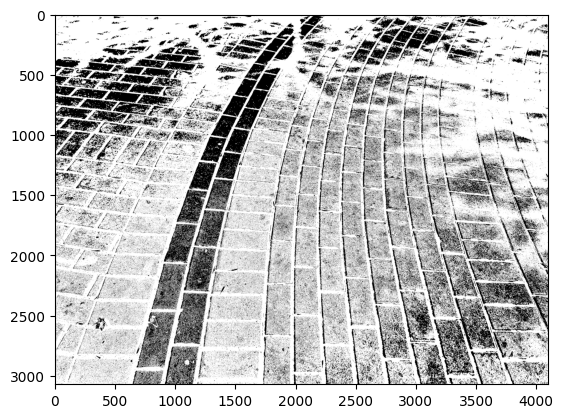

In [49]:
plt.imshow(final_lines, cmap='binary')

In [50]:
# 4. Define the dilation kernel (for the potential line regions)
dilation_kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size as needed

# 5. Dilate the binary lines within the ROI
dilated_lines = cv2.dilate(final_lines, dilation_kernel, iterations=1) # Adjust iterations

# 6. Define the erosion kernel (for the regions outside the initial ROI)
erosion_kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size as needed

# 7. Create a mask for the background (inverse of the ROI mask)
background_mask = cv2.bitwise_not(roi_mask)

# 8. Erode the binary lines in the background regions
eroded_background = cv2.erode(final_lines, erosion_kernel, iterations=1) # Adjust iterations
eroded_background_masked = cv2.bitwise_and(eroded_background, background_mask)

# 9. Combine the dilated lines within the ROI and the eroded background
new_lines = cv2.bitwise_or(cv2.bitwise_and(dilated_lines, roi_mask), eroded_background_masked)

# 10. Display the result
cv2.imshow("Final Isolated Lines", new_lines)
cv2.imwrite("new_lines.png", new_lines)

True

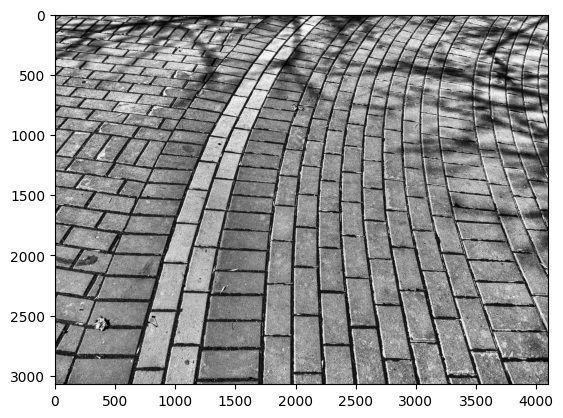

In [ ]:
# today 21.04.2025
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load image
img = cv2.imread("/Users/macbookpro/Desktop/aero_drone_line detection/data/alexey's_data/IMG_20250416_121855.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply CLAHE to improve local contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

# cv2.imshow('CLAHE Output', clahe_img)
plt.imshow(clahe_img, cmap='gray')

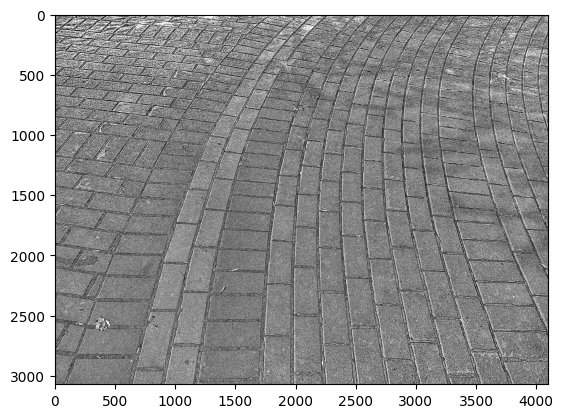

In [6]:
# Adaptive thresholding to handle lighting variations
binary = cv2.adaptiveThreshold(
    clahe_img, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV, 
    blockSize=11,  # Adjust based on line width
    C=2
)

plt.imshow(binary, cmap="binary")

In [8]:
cv2.imwrite("adaptive_threshold.png", binary)

True

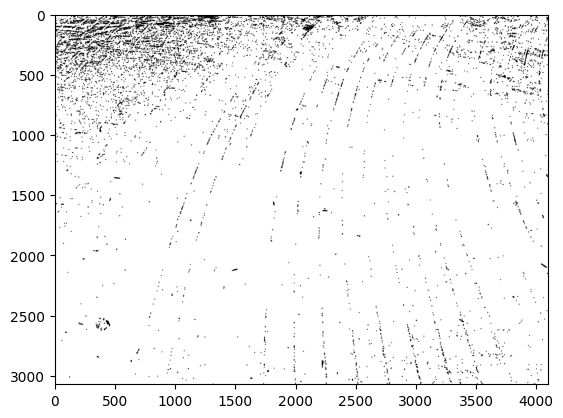

In [7]:
# Morphological closing to connect broken line segments
kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

# Optional: Erosion to thin out the lines (if they're too thick)
morph = cv2.erode(morph, kernel, iterations=1)

plt.imshow(morph, cmap="gray")